In [1]:
# Principal Component Analysis

In [2]:
# FEATURE REDUCTION APPROACH

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplt

In [4]:
data = pd.read_csv("/Users/hardik/Documents/Semester5/3. Data Mining/Mall_Customers_cluster.csv")

In [5]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
data['Genre'] = en.fit_transform(data['Genre'])

In [7]:
X = data.drop('CustomerID',axis=1)

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_new= pca.fit_transform(X)

In [9]:
pca.explained_variance_ratio_

array([0.45118077, 0.44091539])

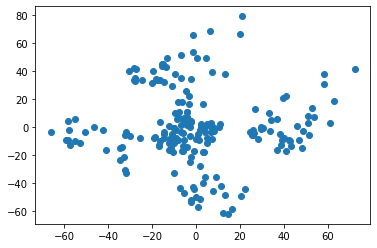

In [10]:
pyplt.scatter(x_new[:,0],x_new[:,1])
pyplt.show()

In [11]:
# K-Mean Clustering

Text(0, 0.5, 'WCC')

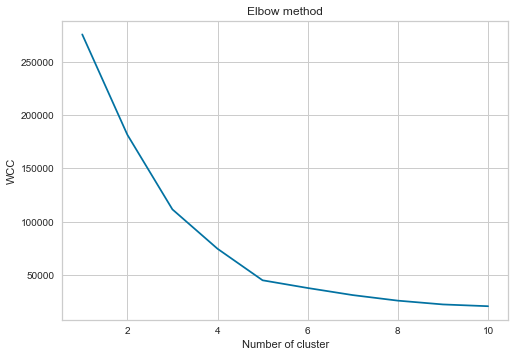

In [22]:
from sklearn.cluster import KMeans
n = []
for i in range(1,11):
    model = KMeans(n_clusters=i , random_state=0)
    model.fit(x_new)
    n.append(model.inertia_)
pyplt.plot(range(1,11),n)
pyplt.title("Elbow method")
pyplt.xlabel("Number of cluster")
pyplt.ylabel("WCC")

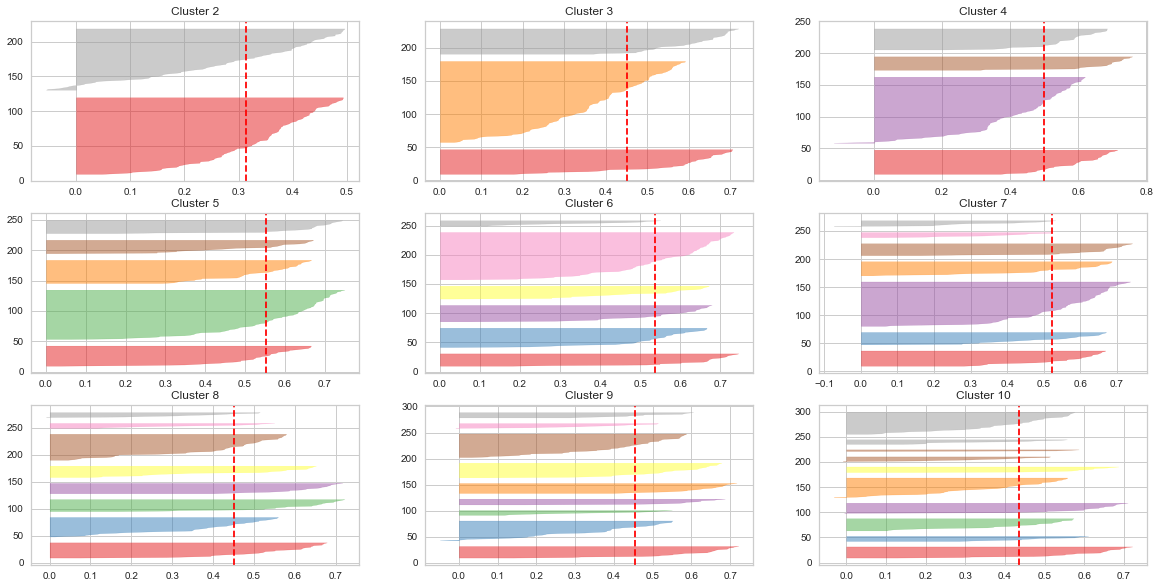

In [23]:
from yellowbrick.cluster import SilhouetteVisualizer
m = 0
fig,ax = pyplt.subplots(3,3,figsize = (20,10))
ax = ax.ravel()
for i in range(2,11):
    model = KMeans(n_clusters=i,random_state=0)
    vis = SilhouetteVisualizer(model,ax[m])
    ax[m].set_title(f"Cluster {i}")
    vis.fit(x_new)
    m+=1

In [30]:
model = KMeans(n_clusters=5,random_state=0)
y = model.fit_predict(x_new)

from sklearn.metrics import silhouette_score
silhouette_score(x_new,y)

0.5526264331833407